In [1]:
import os
import pickle

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime 

import matplotlib.cm as cm
cmap = plt.cm.RdYlGn#sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

# Setup Seaborn
sns.set(rc={'figure.figsize':(20,8)})
sns.set_style("whitegrid", {'axes.grid' : True})

In [2]:
with open('../Data/Crisis_data_cleaned.txt', 'rb') as f:
    results = pickle.load(f)

In [3]:
df = pd.DataFrame.from_records(results)
#df.info()

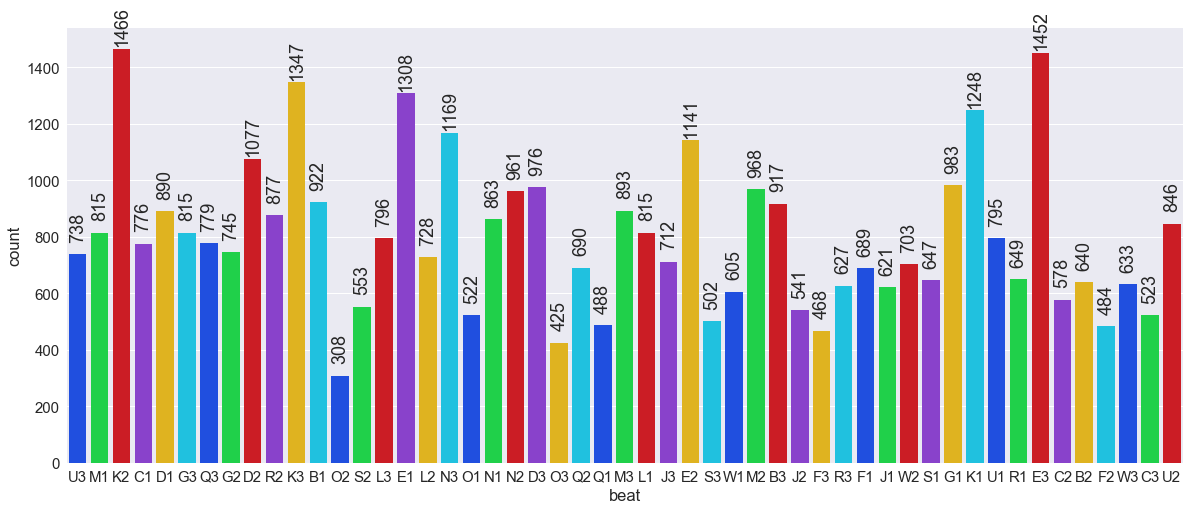

In [4]:
sns.set(font_scale=1.5)
ax = sns.countplot(df.beat, palette="bright")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height+100,'%.0f'%(height), rotation=90)
plt.show()

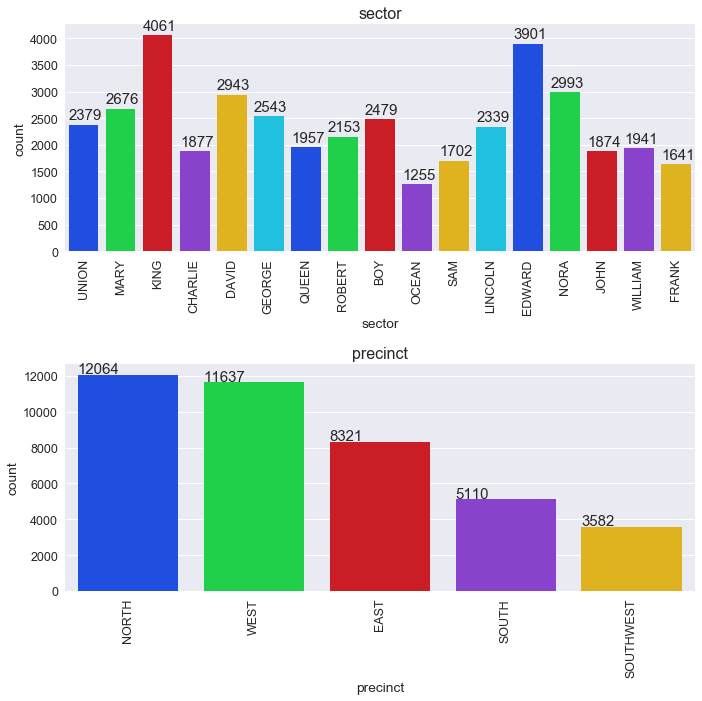

In [5]:
sns.set(font_scale=1.25)
x_colnames = ['sector','precinct']

f, ax = plt.subplots(len(x_colnames), 1, figsize=(10,10), sharex=False, sharey=False)
for i in range(len(x_colnames)):
    axes = sns.countplot(x=x_colnames[i], data=df, ax=ax[i], palette="bright")
    ax[i].set_xticklabels(axes.get_xticklabels() ,rotation=90)
    ax[i].set_title(str(x_colnames[i]) , fontsize=16)
    for p in axes.patches:
        height = p.get_height()
        axes.text(p.get_x(), height+100, '%.0f'%(height))
plt.tight_layout()

In [6]:
precinct_sector = df[['precinct','sector']].groupby(['precinct','sector']).size().reset_index()

In [7]:
# sns.set(font_scale=2.25)
# ax = precinct_sector.pivot("precinct", "sector", 0).plot(kind='bar', stacked=False, figsize=(30,20))
# plt.legend(loc='best')
# 
# for p in ax.patches:
#     height = p.get_height()
#     if (height > 1000):
#         ax.text(p.get_x(), height, '%.0f'%height, rotation=45)
# print(precinct_sector)
# 
# plt.show()

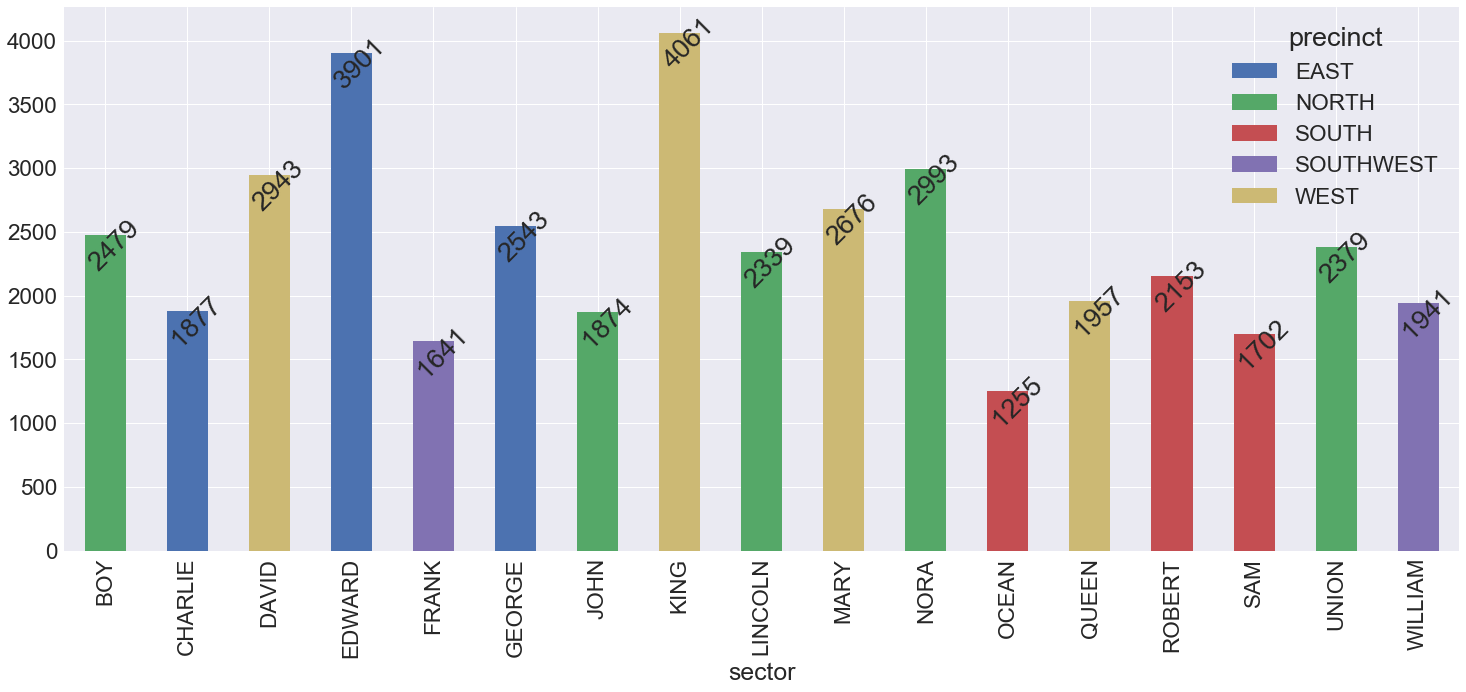

In [8]:
sns.set(font_scale=2.25)

crosstab = pd.crosstab(index=df['sector'],columns=df['precinct'])
ax = crosstab.plot(kind='bar',figsize=(25,10), stacked=True)

for p in ax.patches:
    height = p.get_height()
    if (height > 1000):
        ax.text(p.get_x(), height, '%.0f'%height, rotation=45)
plt.show()

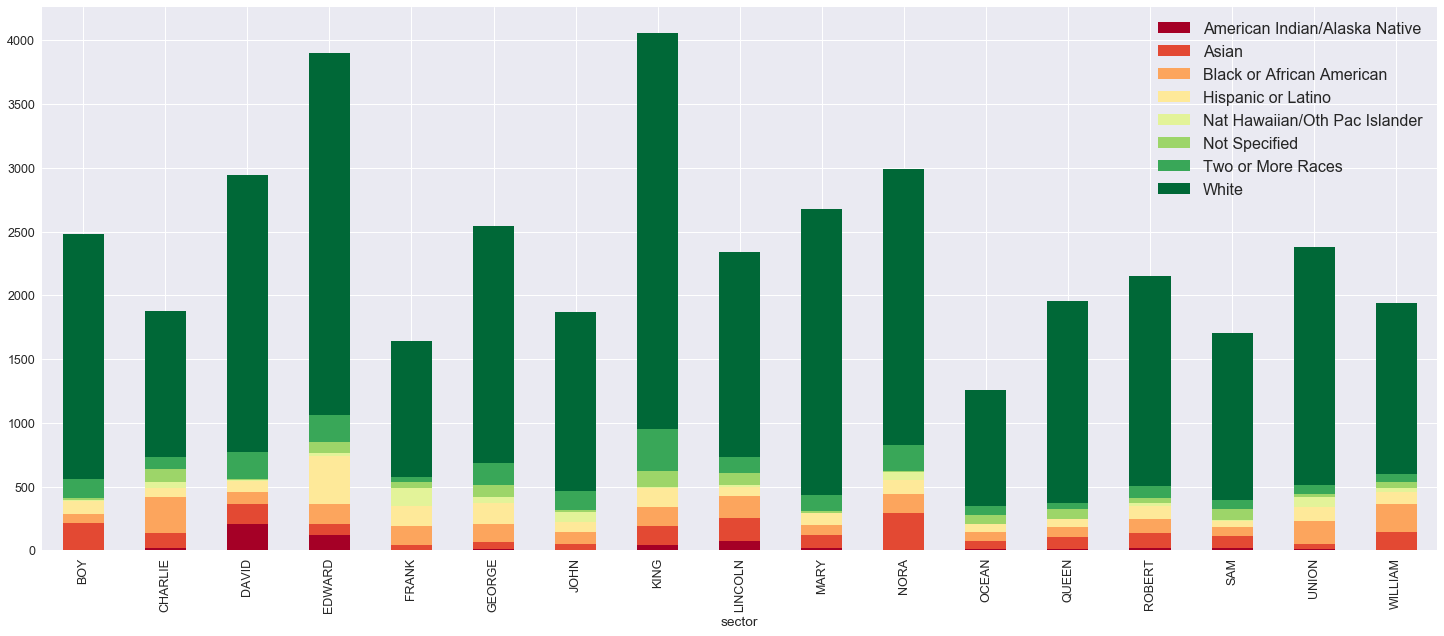

In [34]:
crosstab = pd.crosstab(index=df['sector'],columns=df['officer_race'])
ax = crosstab.plot(kind='bar',figsize=(25,10), stacked=True, cmap=cmap)
plt.legend(fontsize=16)
plt.show()

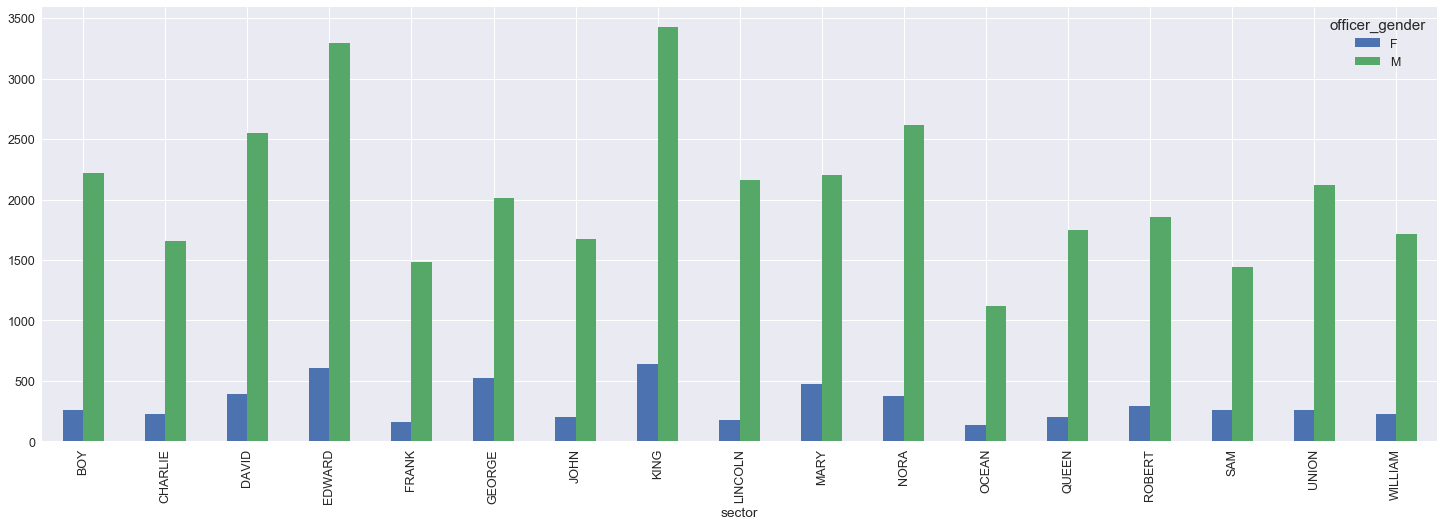

In [36]:
crosstab = pd.crosstab(index=df['sector'],columns=df['officer_gender'])
ax = crosstab.plot(kind='bar',figsize=(25,8), stacked=False)
plt.show()

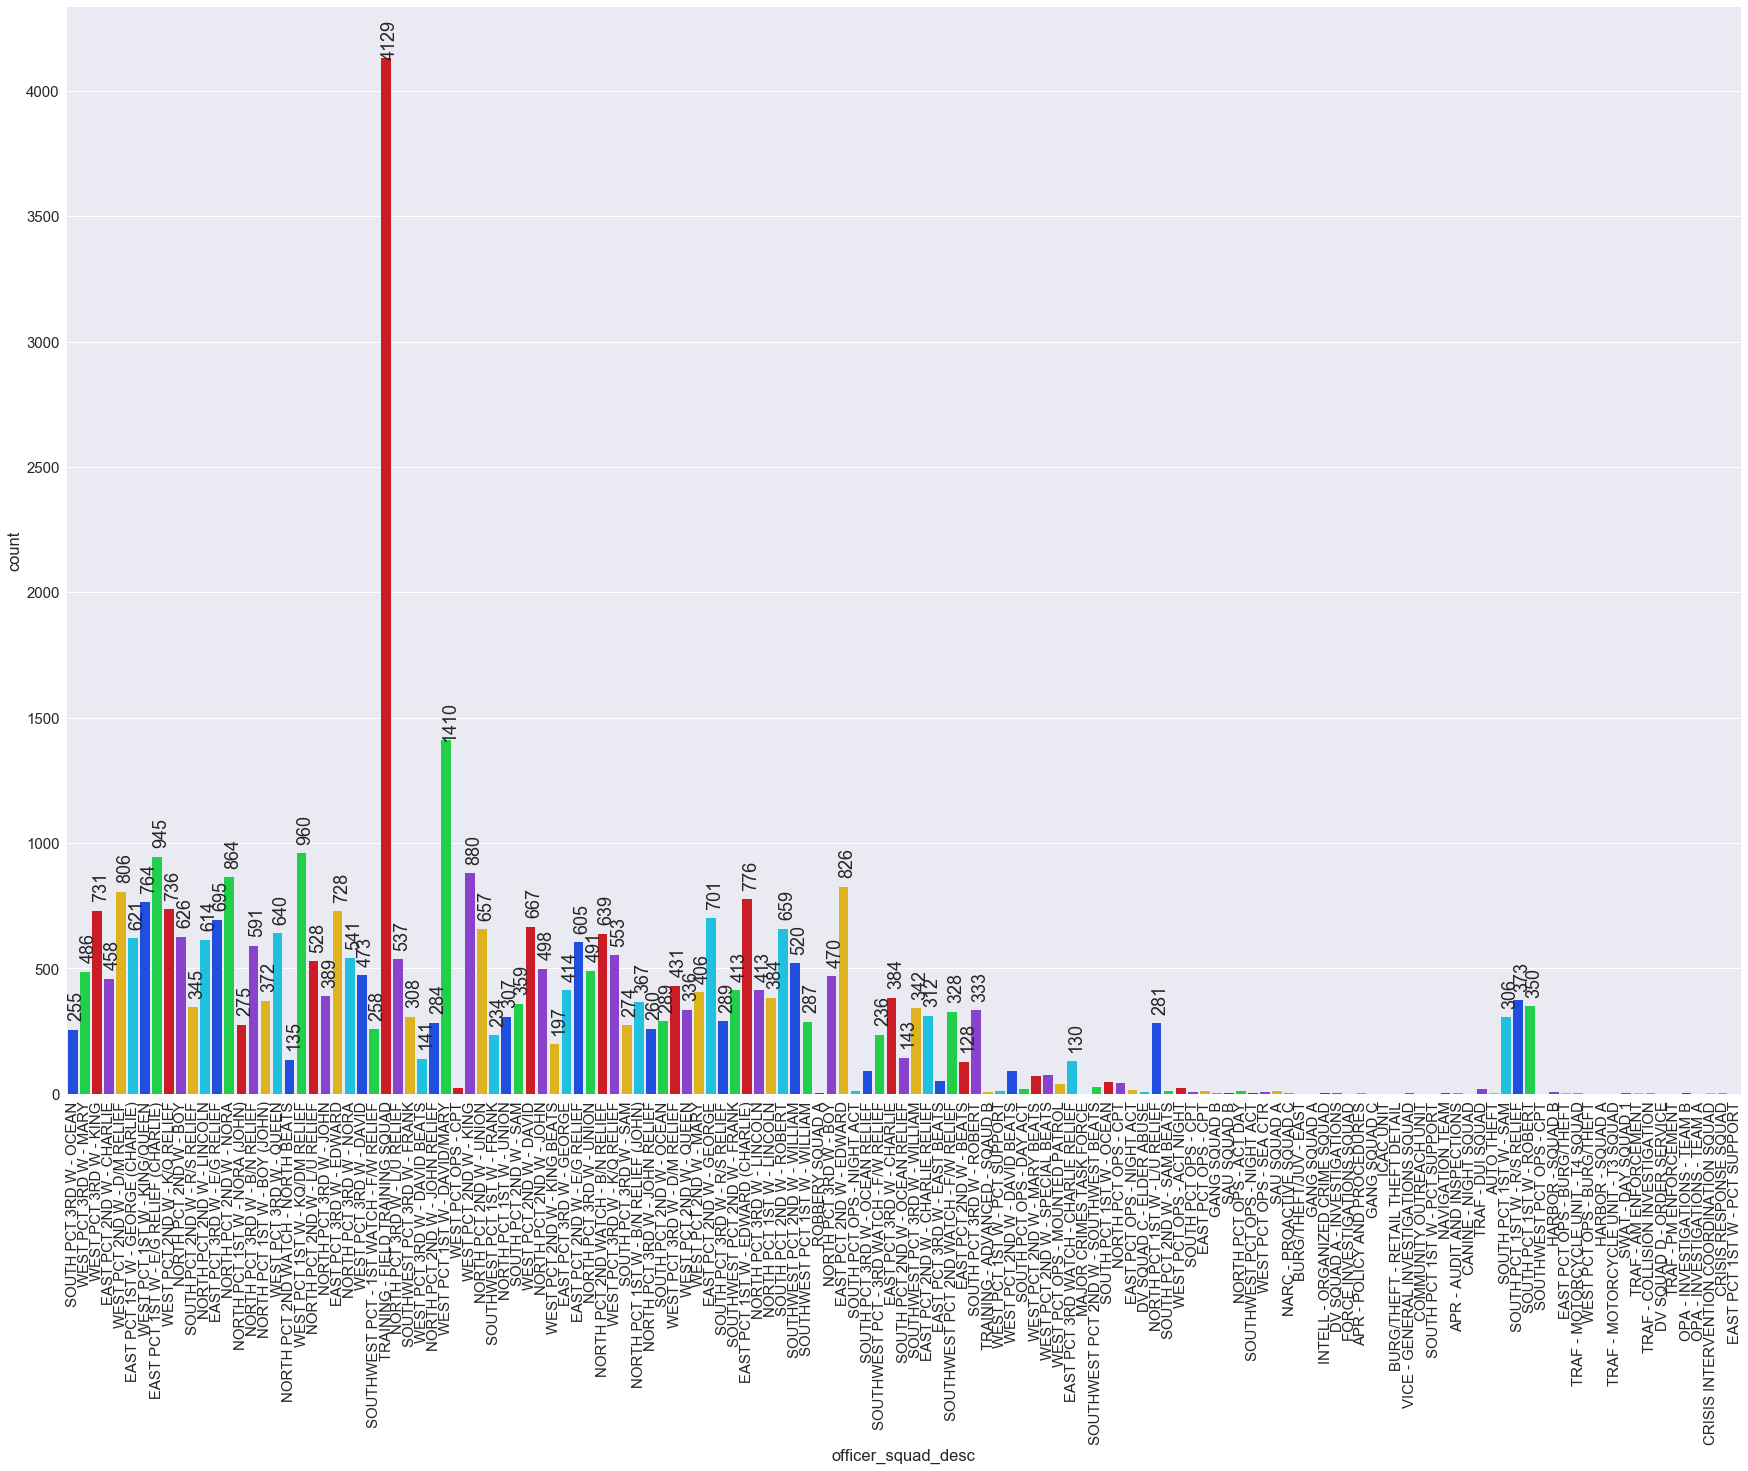

In [11]:
sns.set(font_scale=1.5)
plt.figure(figsize=(30,20))
ax = sns.countplot(df.officer_squad_desc, palette="bright")
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    if (height > 100):
        ax.text(p.get_x(), height+100, '%.0f'%(height), rotation=90)
plt.show()

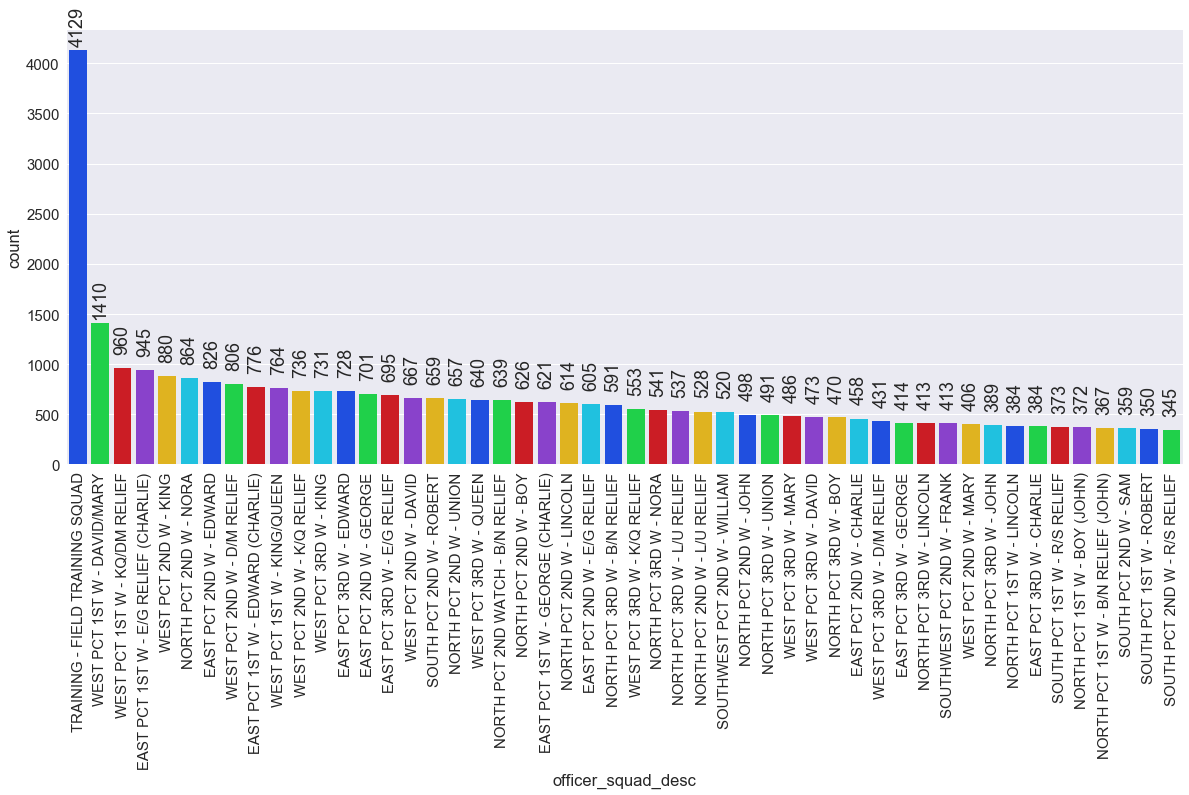

In [12]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20,8))
ax = sns.countplot(df.officer_squad_desc, order=df.officer_squad_desc.value_counts().iloc[:50].index, palette="bright")
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    if (height > 100):
        ax.text(p.get_x(), height+300, '%.0f'%(height), rotation=90)
plt.show()

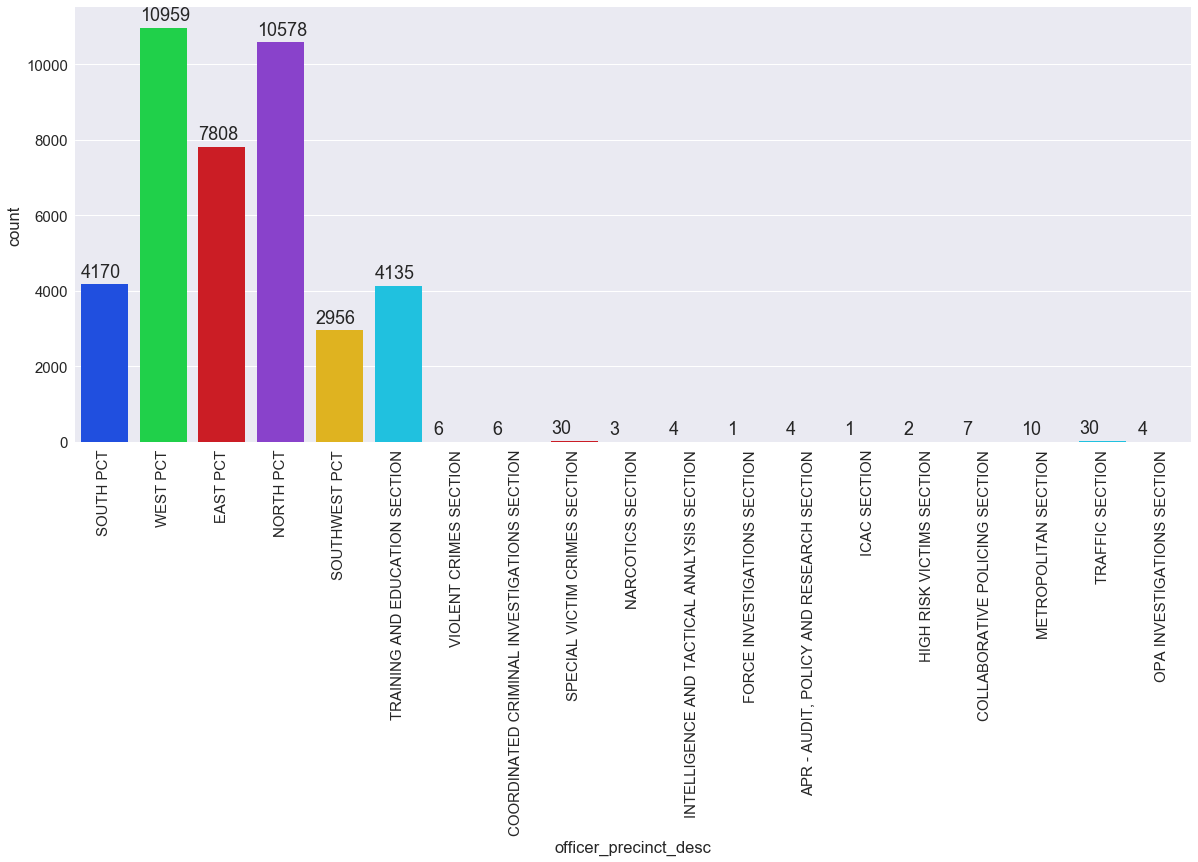

In [13]:
sns.set(font_scale=1.5)
ax = sns.countplot(df.officer_precinct_desc, palette="bright")
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height+200, '%.0f'%(height), rotation=0)
plt.show()

In [14]:
officer_precinct_squad = df[['officer_precinct_desc','officer_squad_desc']].groupby(['officer_precinct_desc','officer_squad_desc']).size().reset_index()

In [15]:
officer_precinct_squad_gt_100 = officer_precinct_squad[officer_precinct_squad[0] > 10]
grp_list = officer_precinct_squad_gt_100['officer_precinct_desc'].unique()
print(grp_list)

['EAST PCT' 'NORTH PCT' 'SOUTH PCT' 'SOUTHWEST PCT'
 'SPECIAL VICTIM CRIMES SECTION' 'TRAFFIC SECTION'
 'TRAINING AND EDUCATION SECTION' 'WEST PCT']


In [16]:
df_officer_precinct_desc_gt_100 = df[df['officer_precinct_desc'].isin(grp_list)]

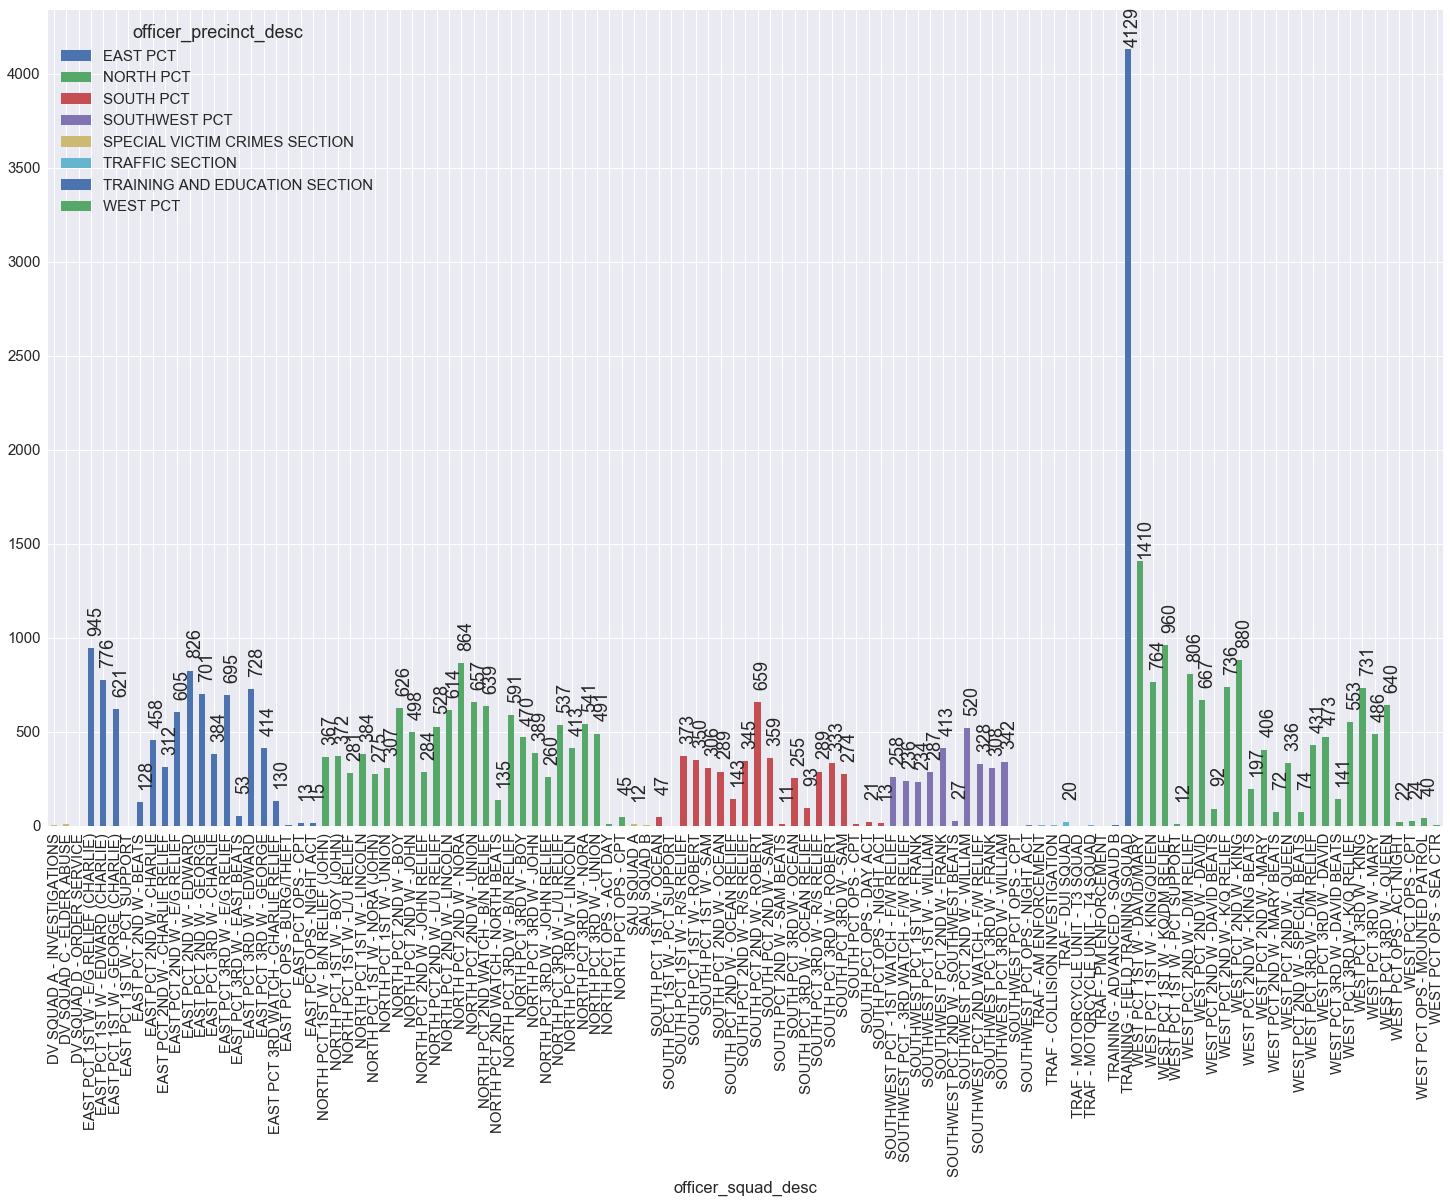

In [17]:
sns.set(font_scale=1.5)

crosstab = pd.crosstab(index=df_officer_precinct_desc_gt_100['officer_squad_desc'],columns=df_officer_precinct_desc_gt_100['officer_precinct_desc'])
ax = crosstab.plot(kind='bar',figsize=(25,15), stacked=True)

for p in ax.patches:
    height = p.get_height()
    if (height > 10):
        ax.text(p.get_x()-0.05, height+150, '%.0f'%height, rotation=90)
plt.show()

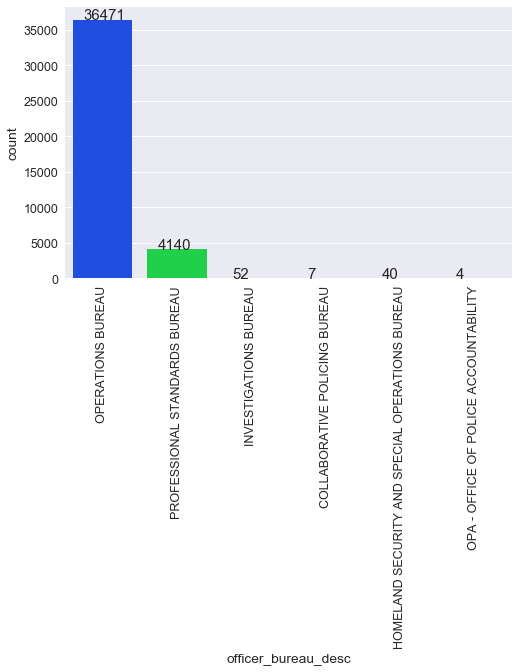

In [18]:
sns.set(font_scale=1.25)
plt.figure(figsize=(8,5))
ax = sns.countplot(df.officer_bureau_desc, palette="bright")
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.15, height, '%.0f'%(height))
plt.show()

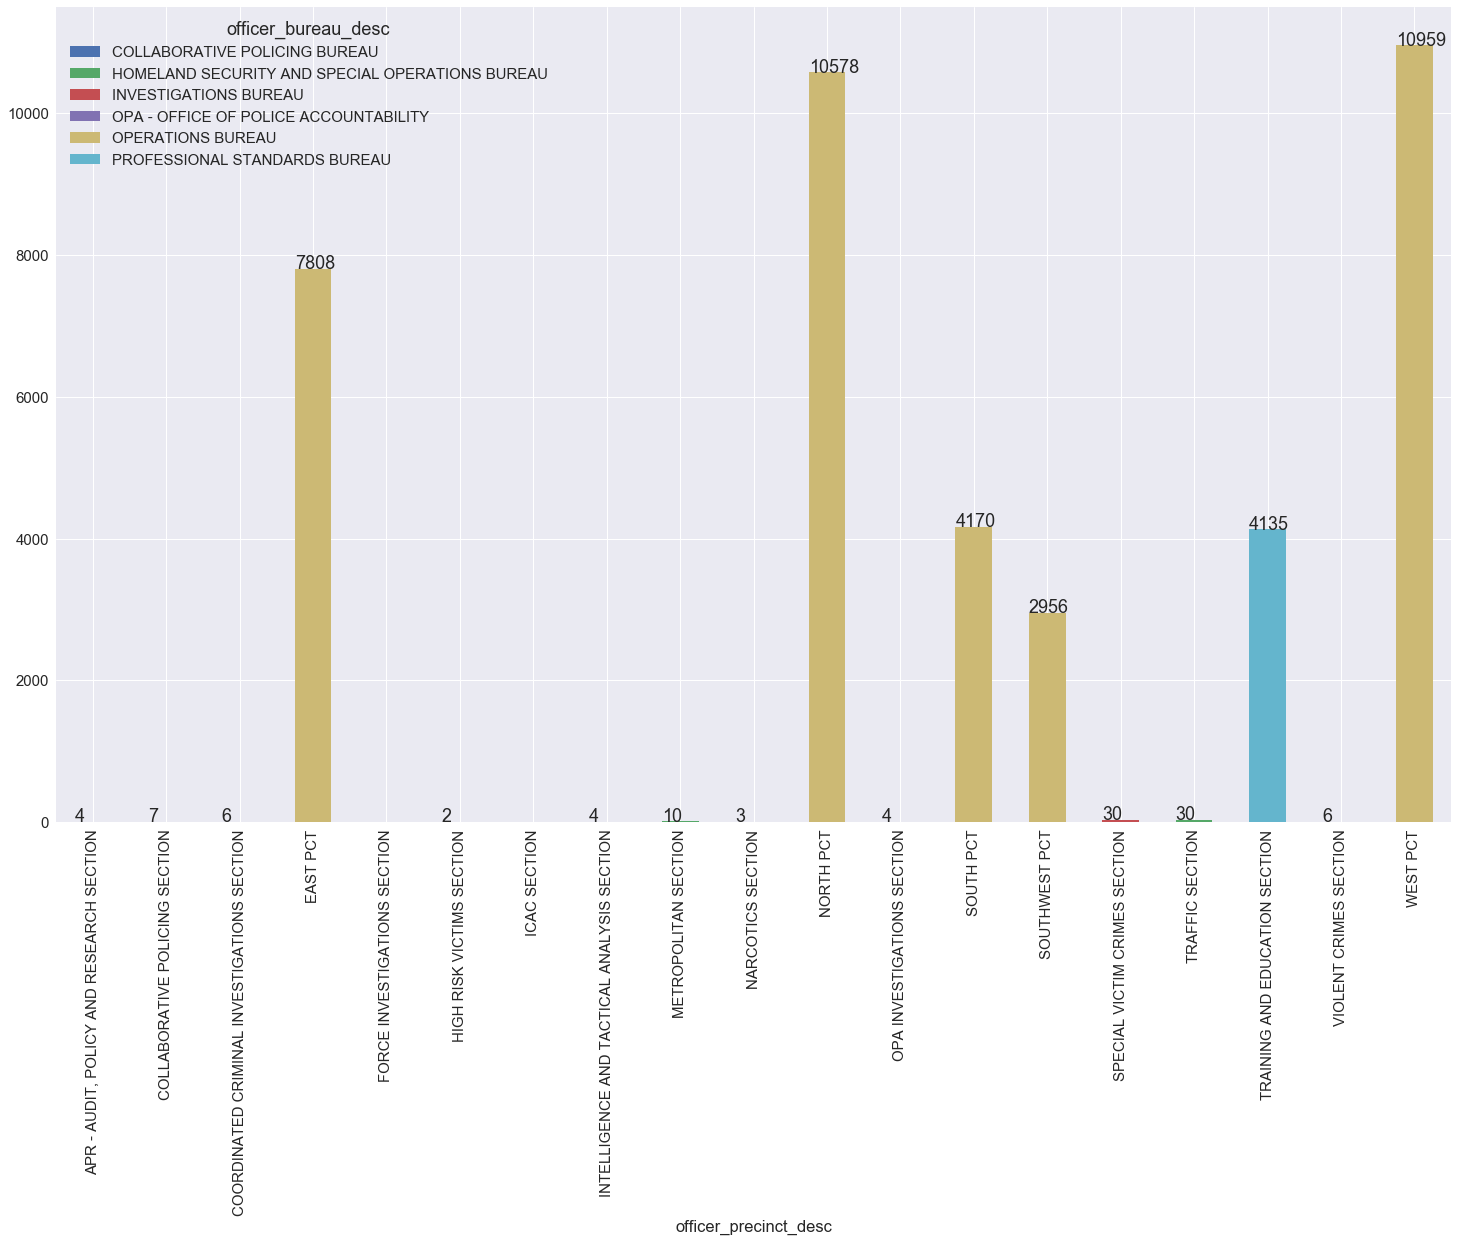

In [19]:
sns.set(font_scale=1.5)
crosstab = pd.crosstab(index=df['officer_precinct_desc'],columns=df['officer_bureau_desc'])
ax = crosstab.plot(kind='bar',figsize=(25,15), stacked=True)
for p in ax.patches:
    height = p.get_height()
    if(height > 1):
        ax.text(p.get_x(), height, '%.0f'%(height))
plt.show()

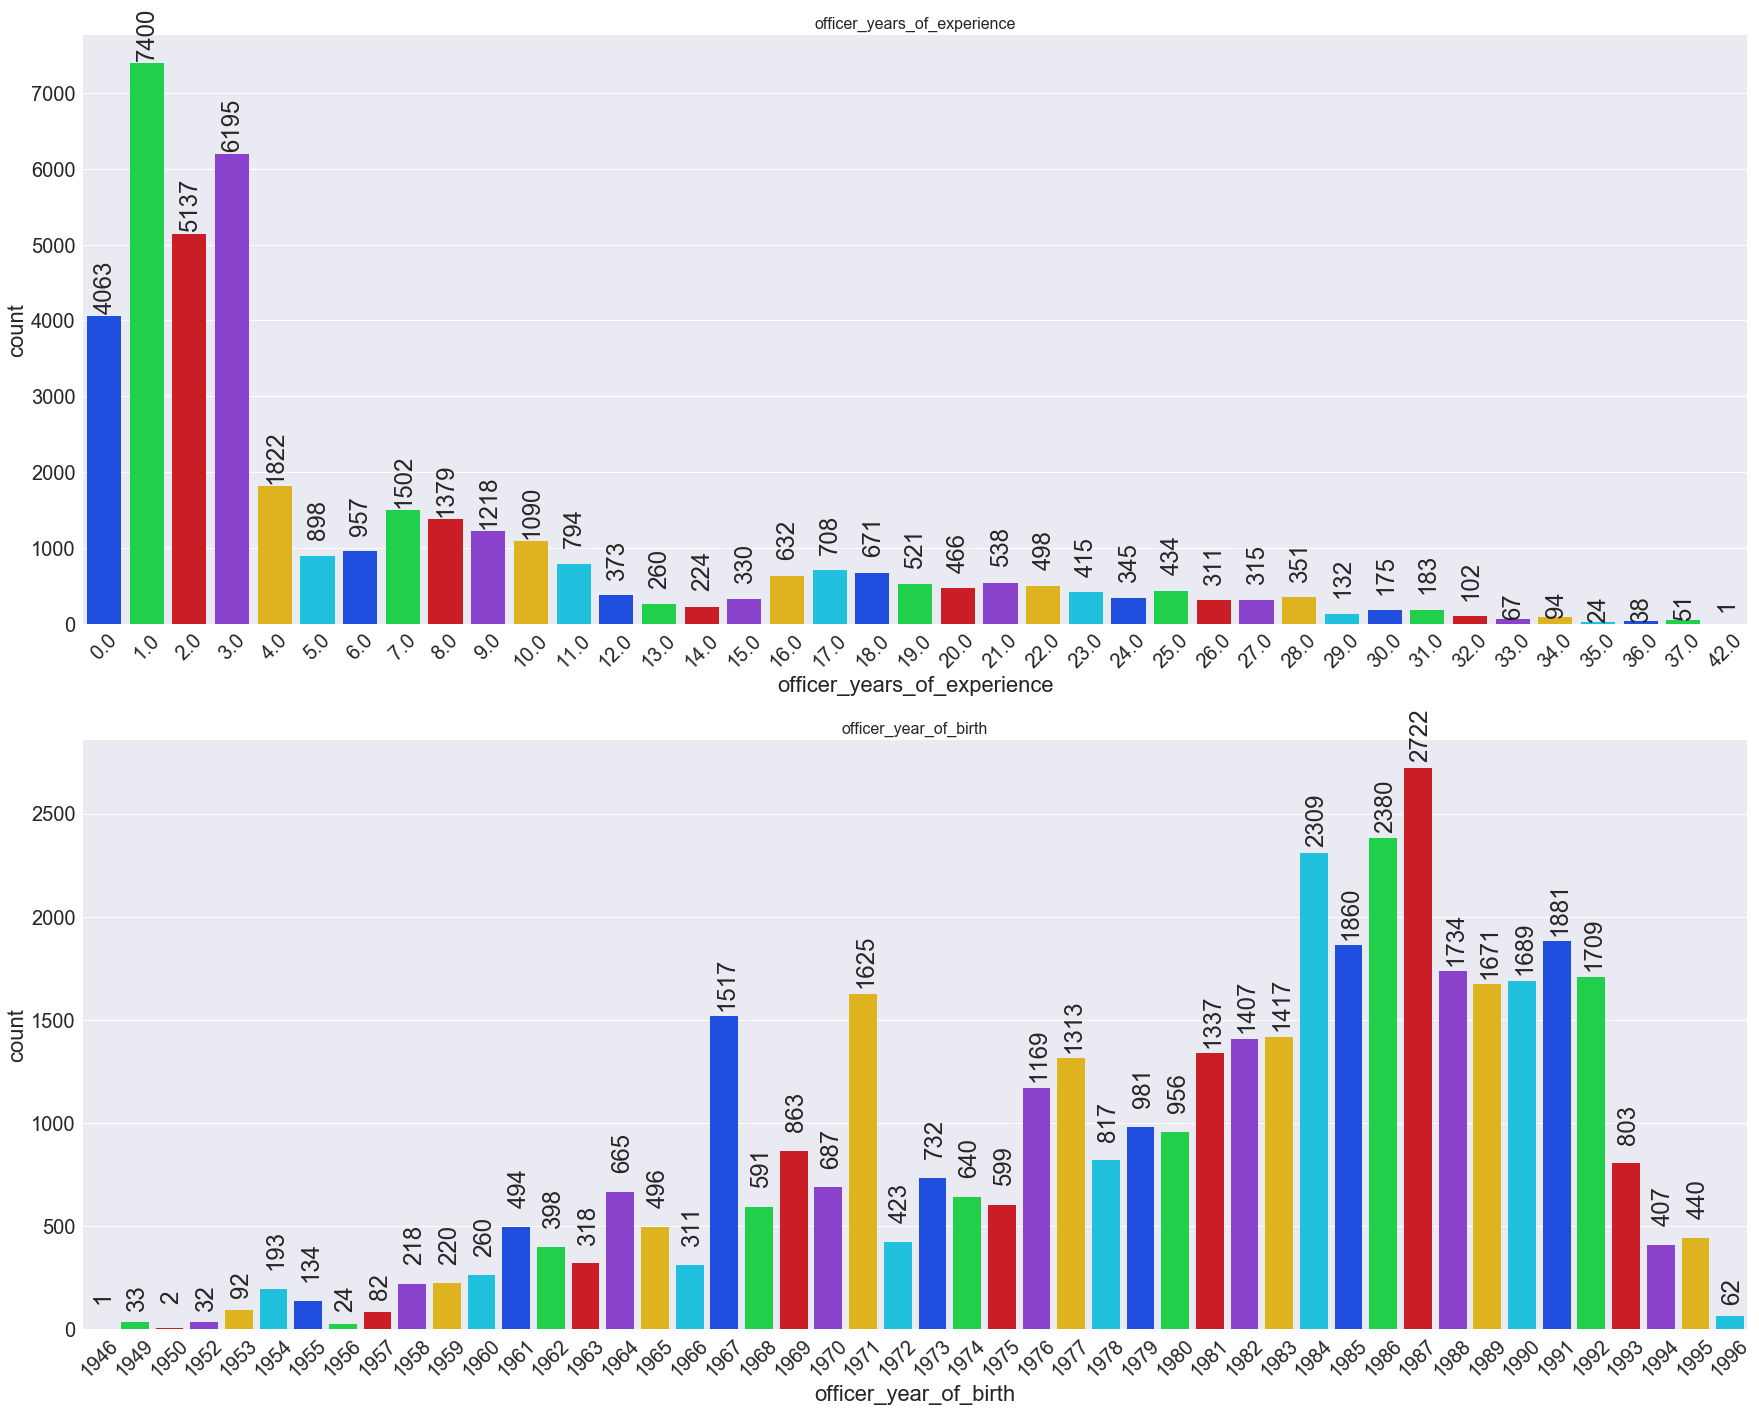

In [20]:
sns.set(font_scale=2.0)

x_colnames = ['officer_years_of_experience','officer_year_of_birth']

f, ax = plt.subplots(len(x_colnames), 1, figsize=(25,20), sharex=False, sharey=False)
for i in range(len(x_colnames)):
    axes = sns.countplot(x=x_colnames[i], data=df, ax=ax[i], palette="bright")
    ax[i].set_xticklabels(axes.get_xticklabels() ,rotation=45)
    ax[i].set_title(str(x_colnames[i]) , fontsize=16)
    for p in axes.patches:
        height = p.get_height()
        extraheight = 500 if x_colnames[i] != 'officer_year_of_birth' else 200
        if height > 0 and height < 100 :
            extraheight = 100
        axes.text(p.get_x()+0.15, height+extraheight, '%.0f'%(height), rotation=90)
plt.tight_layout()

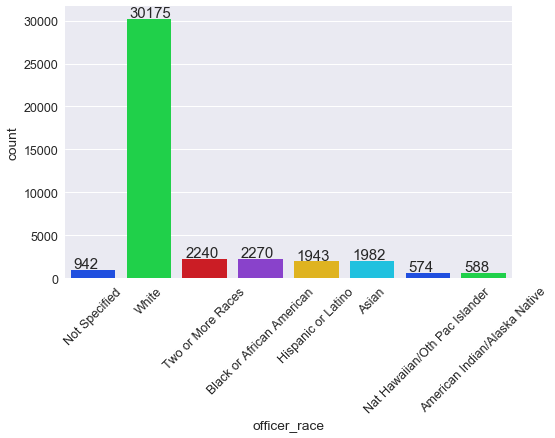

In [21]:
sns.set(font_scale=1.25)
plt.figure(figsize=(8,5))
ax = sns.countplot(df.officer_race,palette="bright")
plt.xticks(rotation=45)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.05, height+200, '%.0f'%(height))
plt.show()

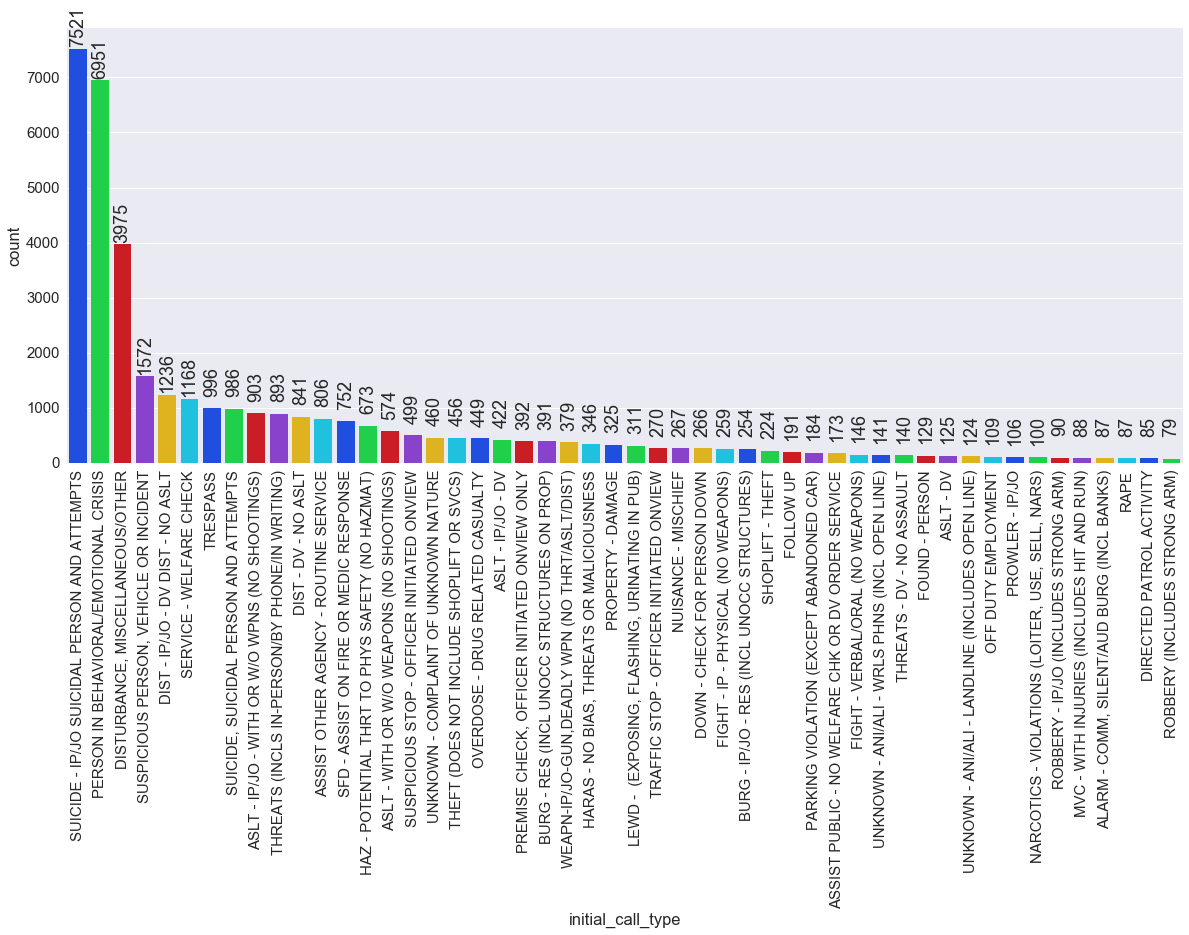

In [22]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20,8))
ax = sns.countplot(df.initial_call_type, order=df.initial_call_type.value_counts().iloc[:50].index, palette="bright")
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height+500, '%.0f'%(height), rotation=90)
plt.show()

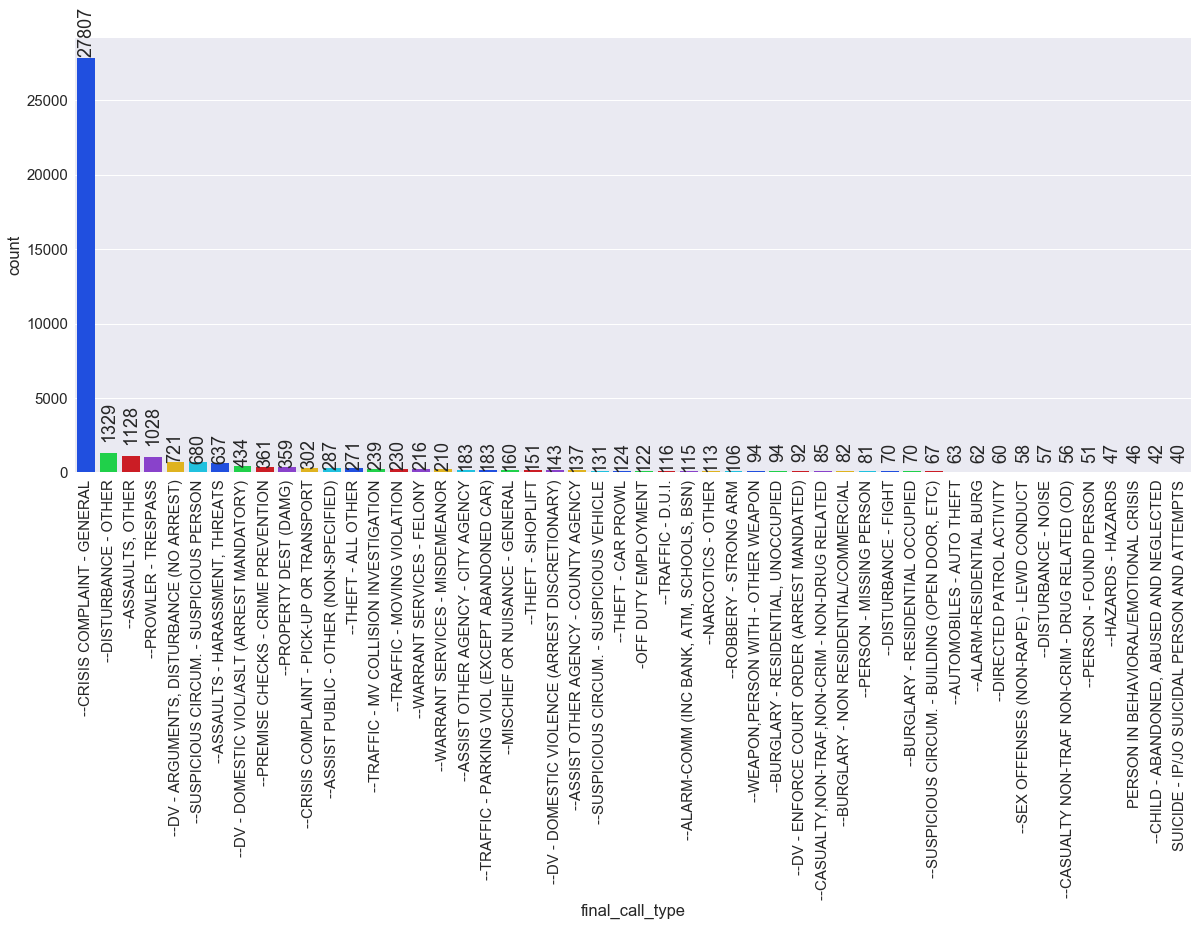

In [23]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20,8))
ax = sns.countplot(df.final_call_type, order=df.final_call_type.value_counts().iloc[:50].index, palette="bright")
for p in ax.patches:
    height = p.get_height()
    extraheight = 2500
    if height > 10 and height < 1000:
        extraheight = 1000
    ax.text(p.get_x(), height+extraheight, '%.0f'%(height), rotation=90)
plt.xticks(rotation=90)
plt.show()

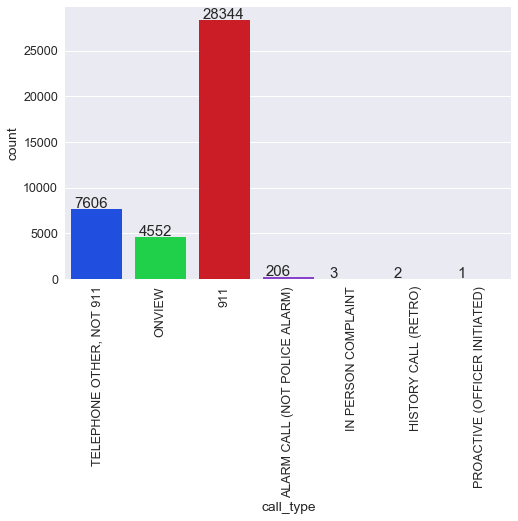

In [24]:
sns.set(font_scale=1.25)
plt.figure(figsize=(8,5))
ax = sns.countplot(df.call_type, palette="bright")
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.05, height+150, '%.0f'%(height))
plt.show()

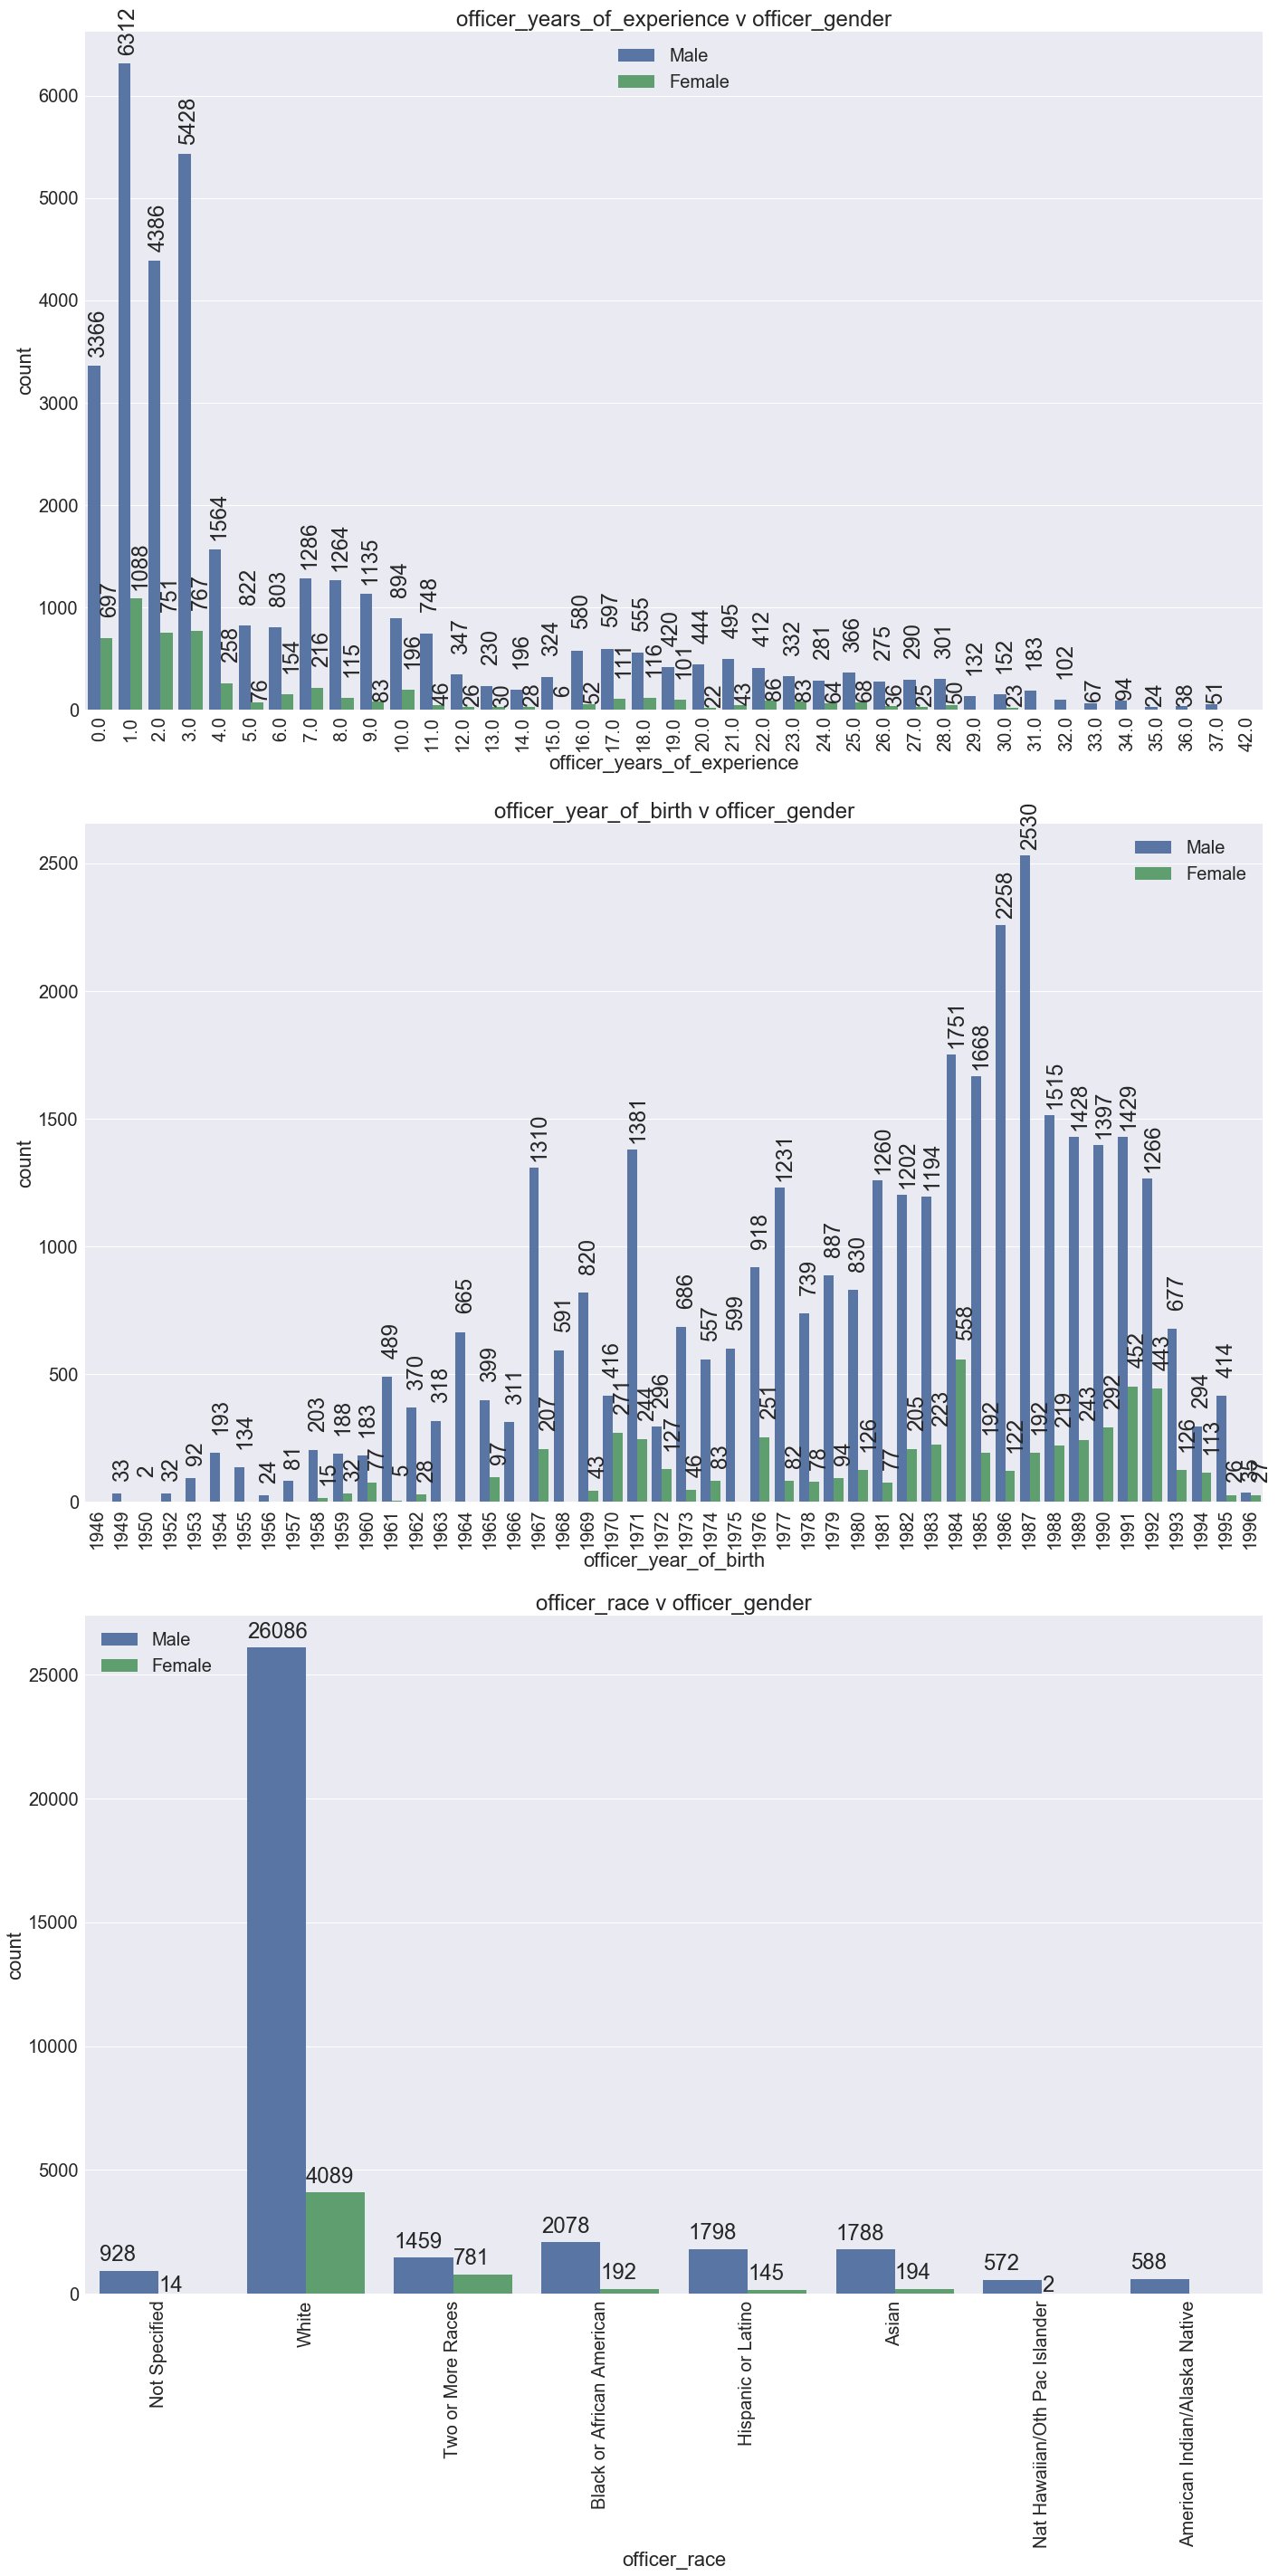

In [25]:
sns.set(font_scale=2.0)
x_colnames = ['officer_years_of_experience','officer_year_of_birth','officer_race']

f, ax = plt.subplots(len(x_colnames), 1, figsize=(20,40), sharex=False, sharey=False)
for i in range(len(x_colnames)):
    axes = sns.countplot(x=x_colnames[i], data=df, ax=ax[i], hue='officer_gender')
    axes.legend(('Male','Female'))
    ax[i].set_xticklabels(axes.get_xticklabels() ,rotation=90)
    ax[i].set_title(str(x_colnames[i]) +" v officer_gender", fontsize=24)
    rotation = 90 if x_colnames[i] != 'officer_race' else 0
    for p in axes.patches:
        height = p.get_height()
        if height > 1:
            extraheight = 400 if x_colnames[i] != 'officer_year_of_birth' else 150
            if height <= 100:
                extraheight = 80
            axes.text(p.get_x(), height+extraheight, '%.0f'%(height), rotation=rotation)
plt.tight_layout()
plt.show()

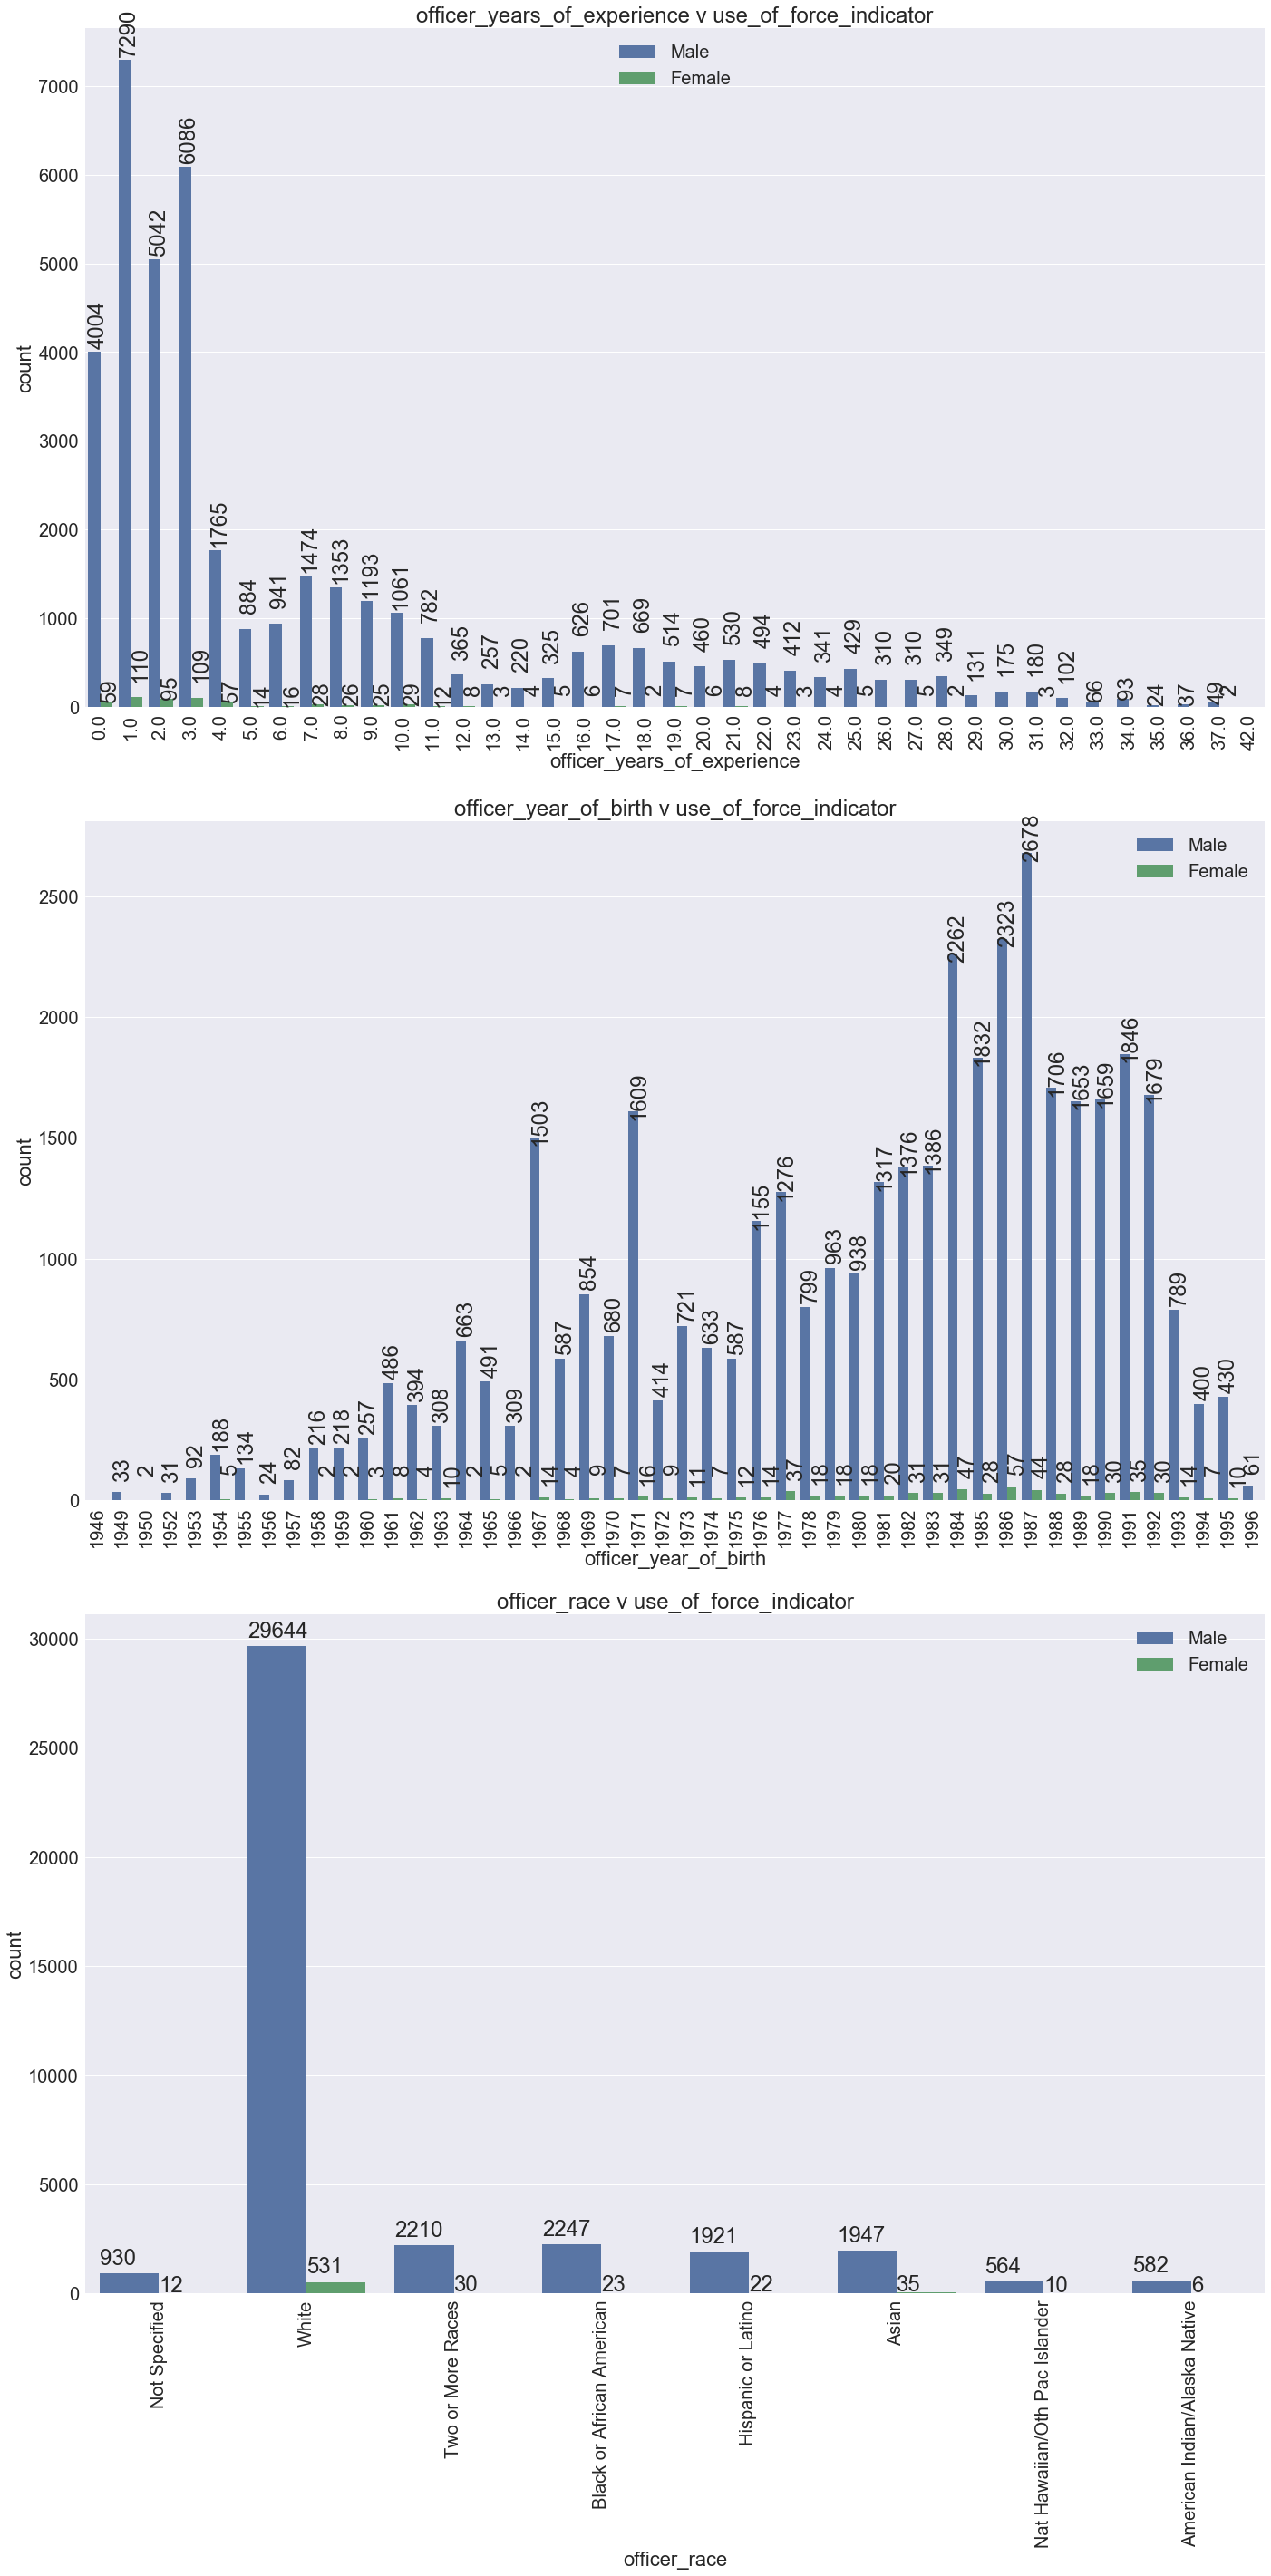

In [26]:
sns.set(font_scale=2.0)
x_colnames = ['officer_years_of_experience','officer_year_of_birth', 'officer_race']

f, ax = plt.subplots(len(x_colnames), 1, figsize=(20,40), sharex=False, sharey=False)
for i in range(len(x_colnames)):
    axes = sns.countplot(x=x_colnames[i], data=df, ax=ax[i], hue='use_of_force_indicator')
    axes.legend(('Male','Female'))
    ax[i].set_xticklabels(axes.get_xticklabels() ,rotation=90)
    ax[i].set_title(str(x_colnames[i]) +" v use_of_force_indicator", fontsize=24)
    rotation = 90 if x_colnames[i] != 'officer_race' else 0
    for p in axes.patches:
        height = p.get_height()
        if height > 1:
            extraheight = 400 if x_colnames[i] != 'officer_year_of_birth' else 100
            if height <= 100:
                extraheight = 80
            axes.text(p.get_x(), height+extraheight, '%.0f'%(height), rotation=rotation)
plt.tight_layout()
plt.show()

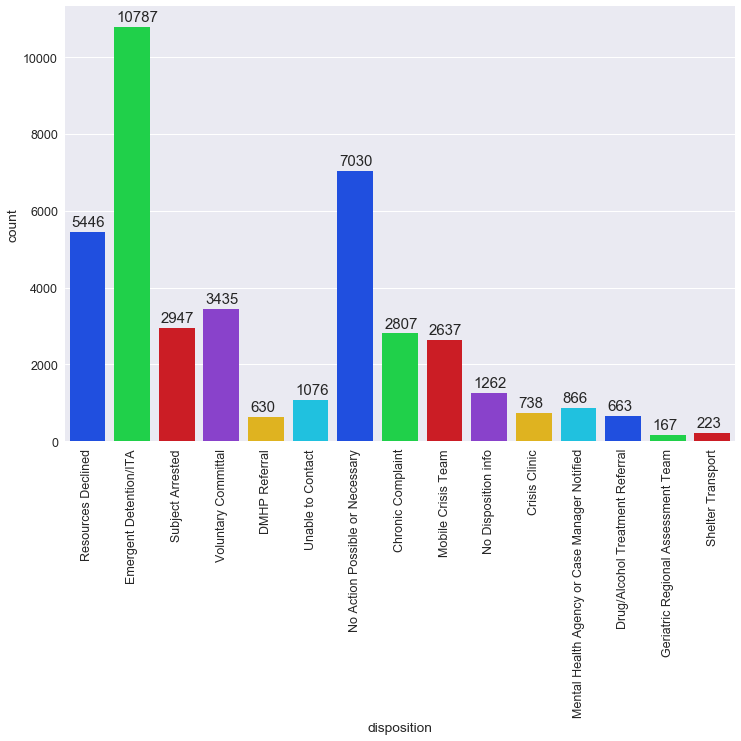

In [27]:
sns.set(font_scale=1.25)
plt.figure(figsize=(12,8))
ax = sns.countplot(df.disposition, palette="bright")
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.05, height+150, '%.0f'%(height))
plt.show()

In [28]:
df_initial_call_type_10 = df[df['initial_call_type'].isin(df.initial_call_type.value_counts().iloc[:10].index)]
df_final_call_type_10 = df[df['final_call_type'].isin(df.final_call_type.value_counts().iloc[:10].index)]

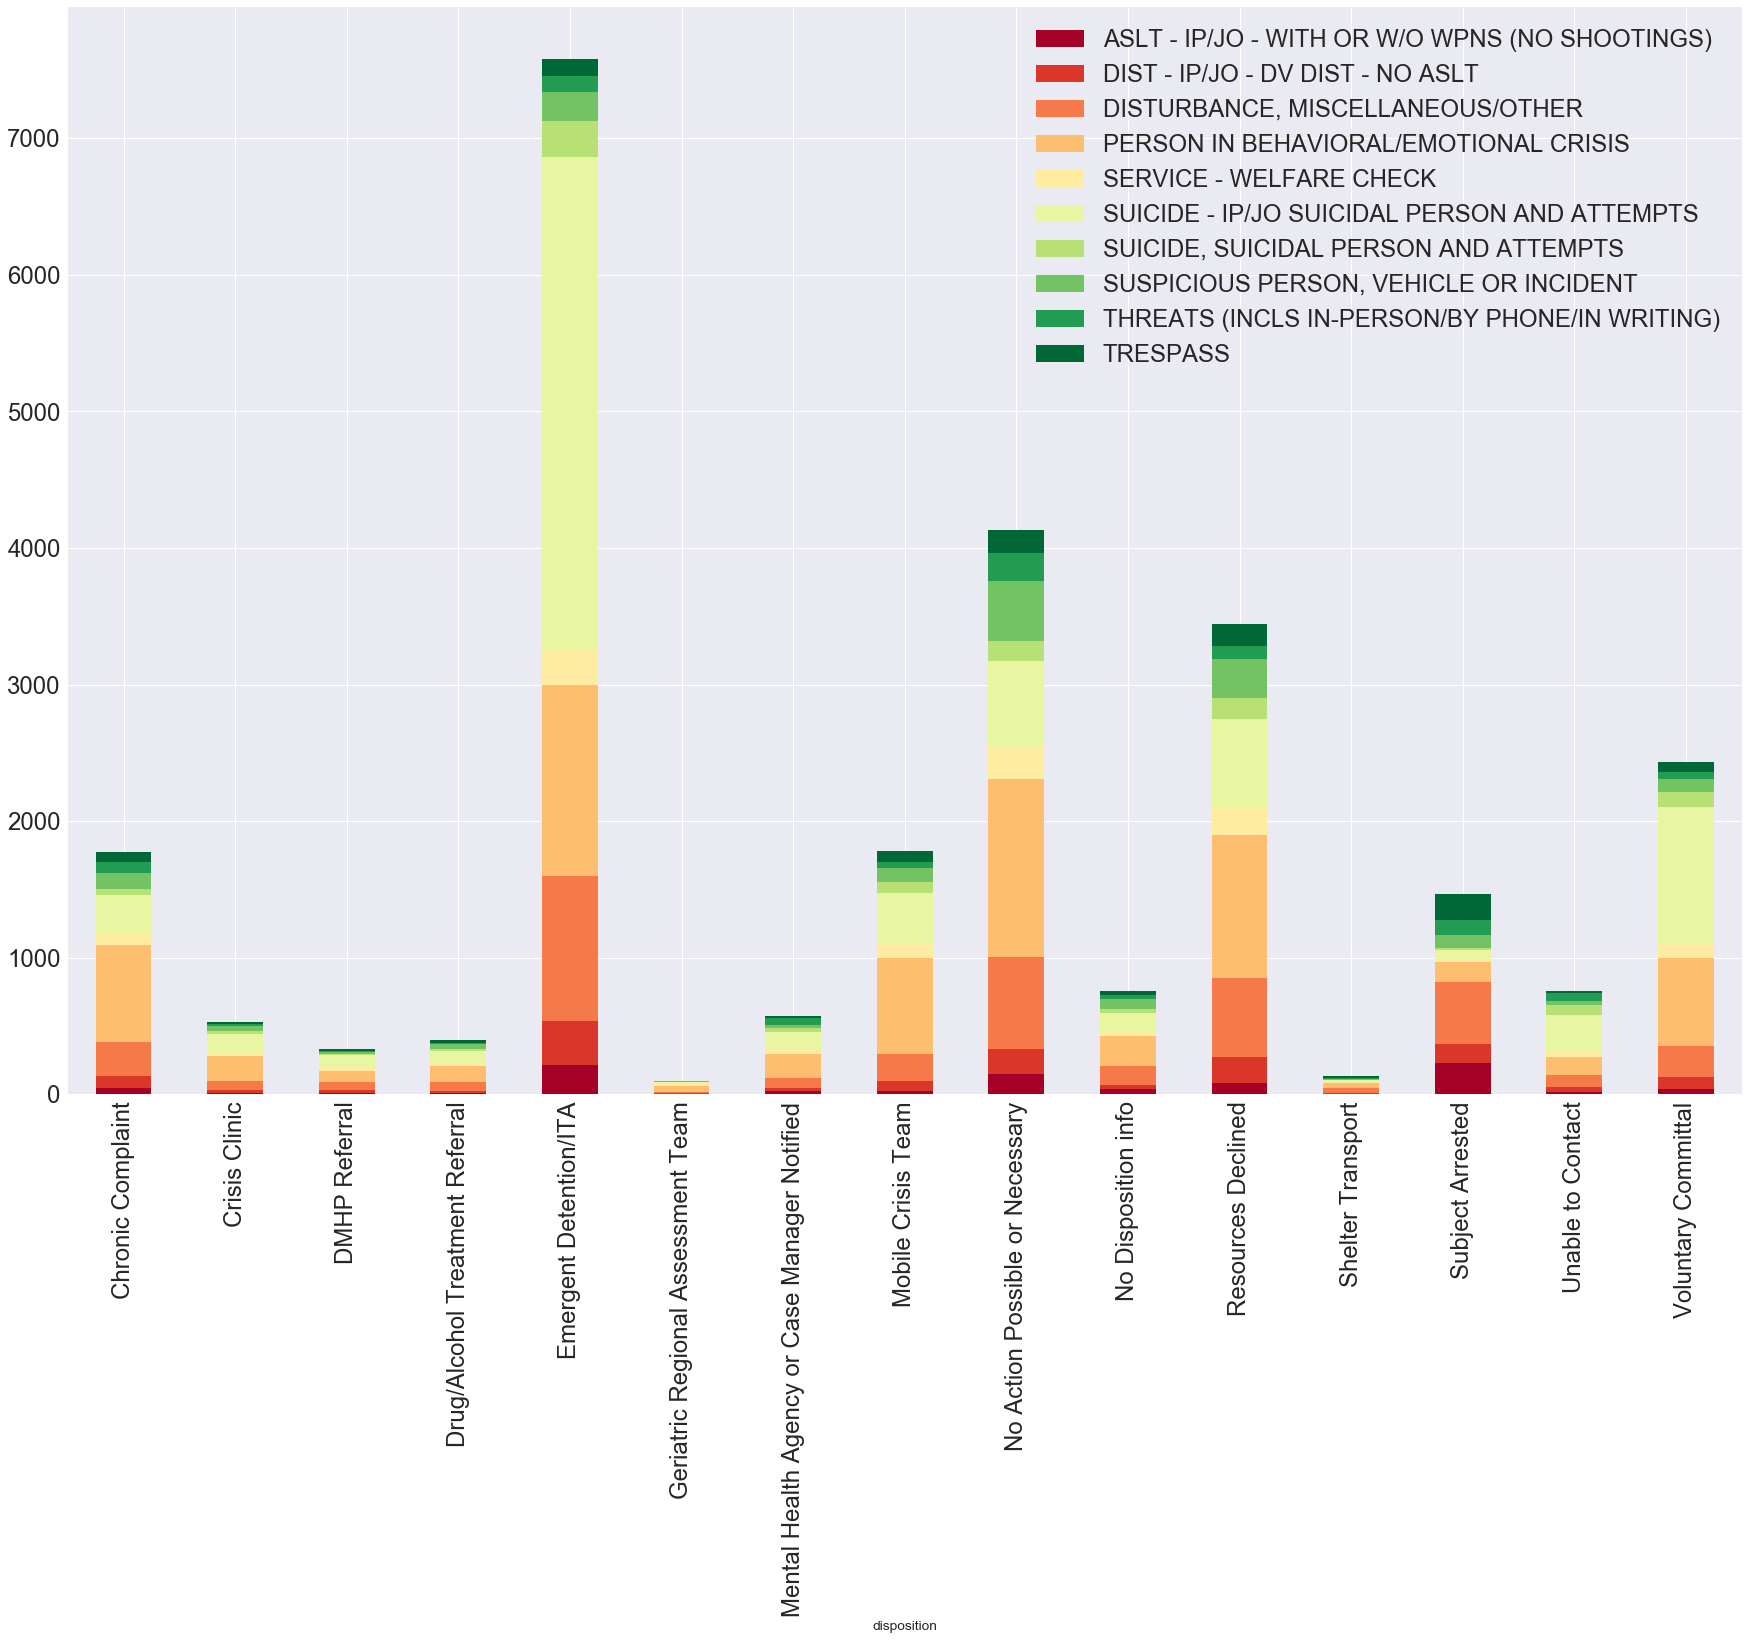

In [29]:
crosstab = pd.crosstab(index=df_initial_call_type_10['disposition'],columns=df_initial_call_type_10['initial_call_type'])
ax = crosstab.plot(kind='bar',figsize=(30,20), stacked=True, fontsize=24, cmap=cmap)
plt.legend(fontsize=24)
plt.show()

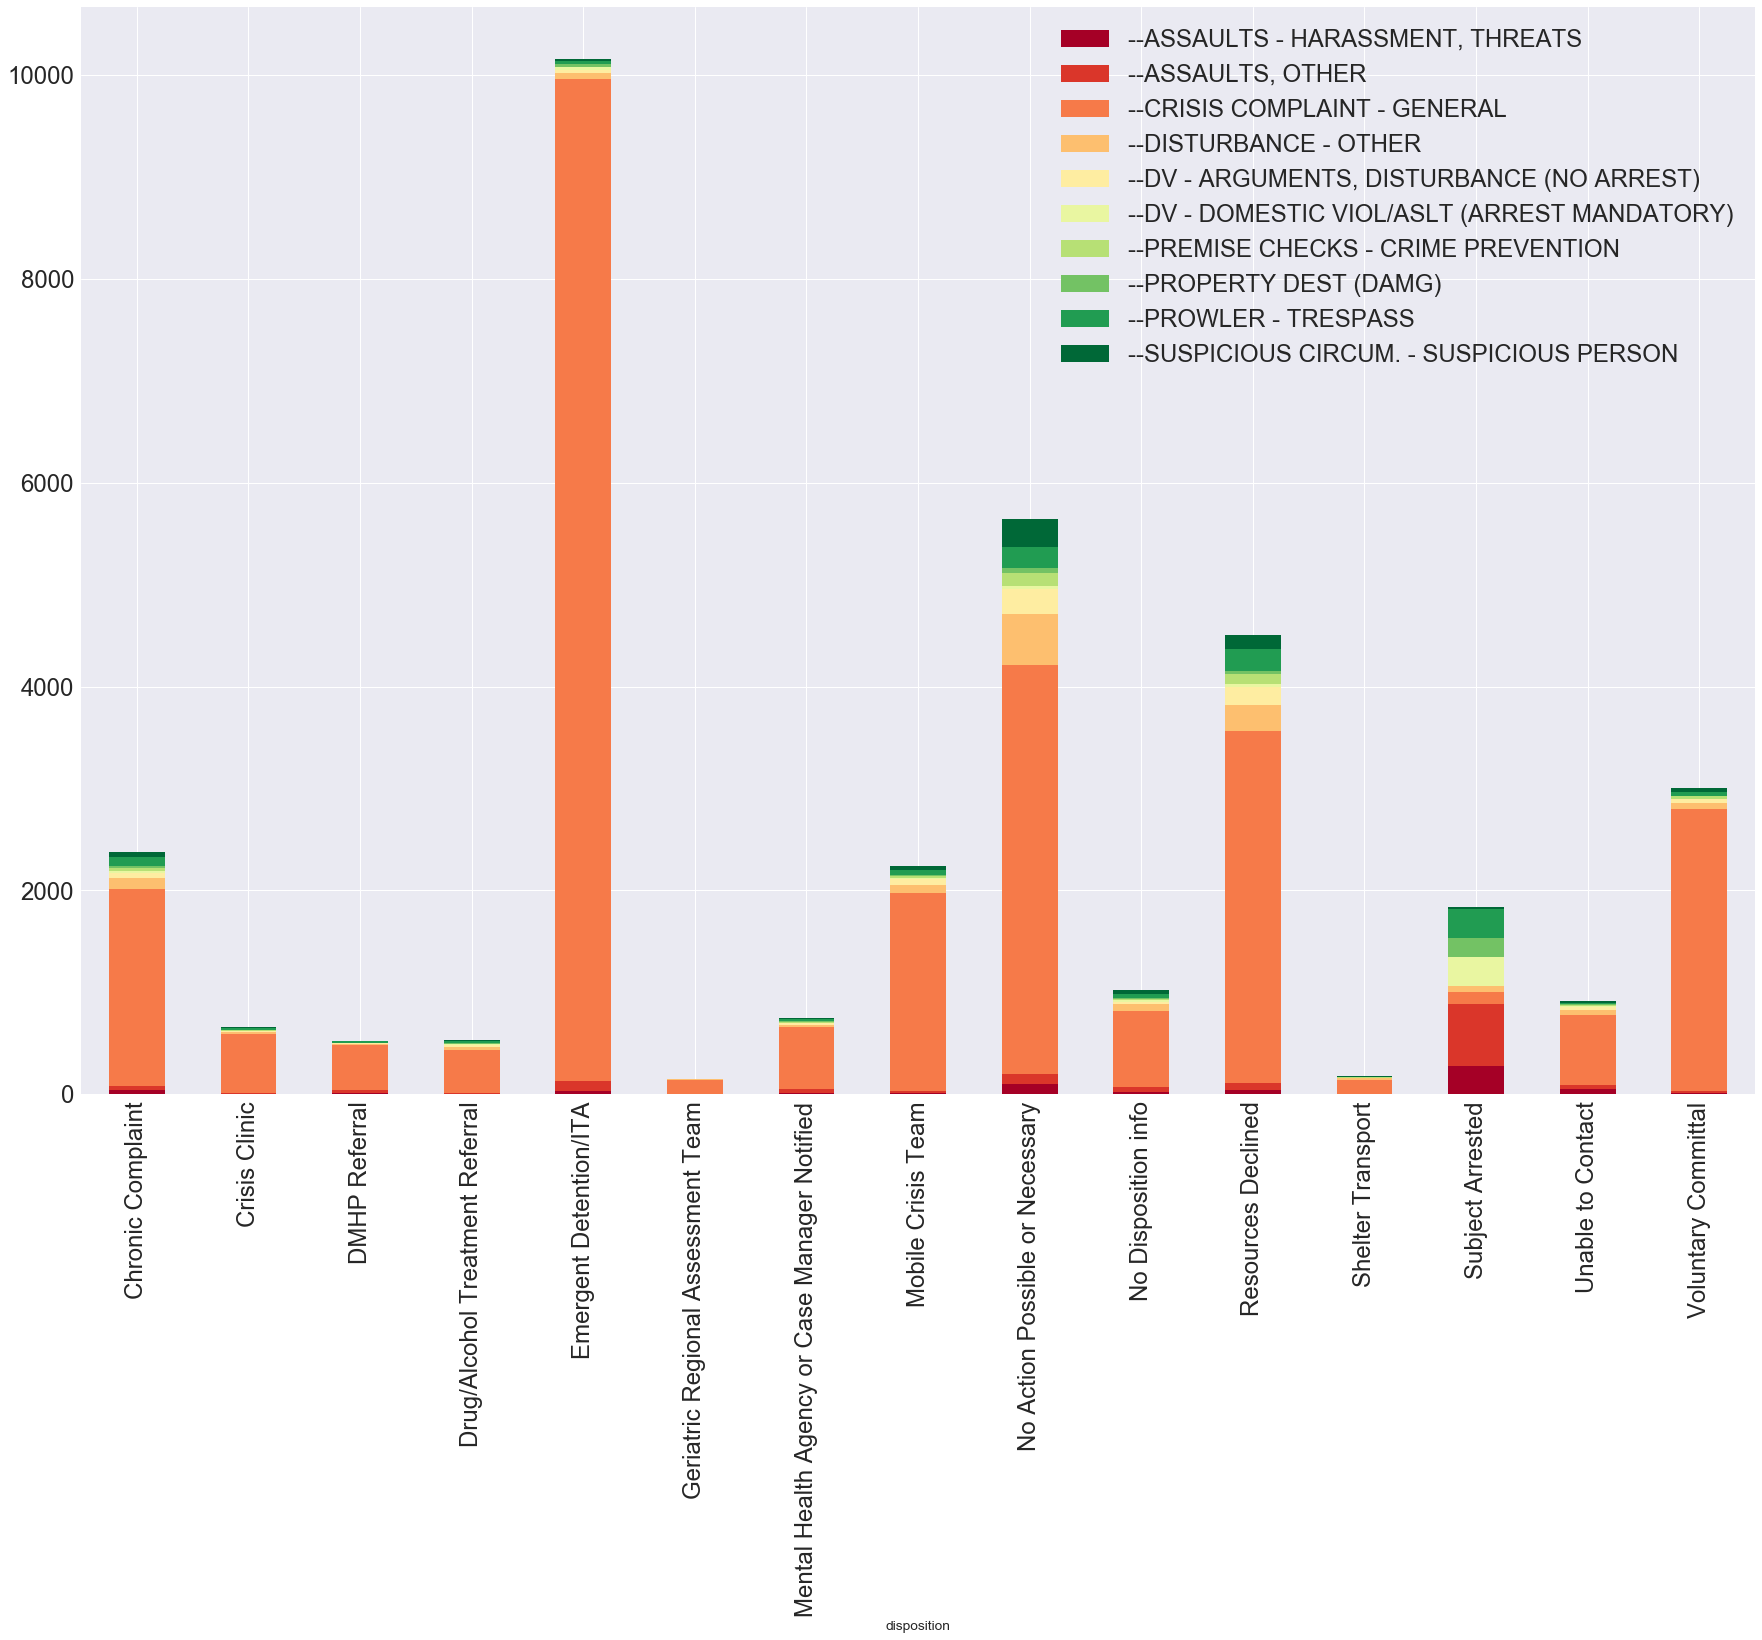

In [30]:
crosstab = pd.crosstab(index=df_final_call_type_10['disposition'],columns=df_final_call_type_10['final_call_type'])
ax = crosstab.plot(kind='bar',figsize=(30,20), stacked=True, fontsize=24, cmap=cmap)
plt.legend(fontsize=24)
plt.show()

## Do a officer_id more than 2

In [31]:
print("Number of officers:",df.officer_id.nunique())

Number of officers: 952


In [32]:
print("Number of templates:",df.template_id.nunique())

Number of templates: 33586


# Time Analysis.

## Will be continued in the next notebook.